# **Importing, Downloading and Installing Libraries**

In [2]:
!pip install wordcloud
import re
import numpy as np
import nltk
!pip install folium
import folium
nltk.download('stopwords')
import statistics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.
jupyter-server 1.13.5 requires pywinpty<2; os_name == "nt", but you have pywinpty 2.0.2 which is incompatible.


  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sachin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Cleaning The Data Set**

In [3]:
#Reading the data set CSV file.
hotels = pd.read_csv("Hotel_Reviews.csv")
hotels.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [4]:
#Converting variables to int typ which are supposed to be int.
hotels['days_since_review'] = hotels['days_since_review'].str.replace(r'\D', '').astype(int)

C:\Users\sachin\AppData\Local\Temp\ipykernel_10148\2875624483.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  hotels['days_since_review'] = hotels['days_since_review'].str.replace(r'\D', '').astype(int)


In [5]:
hotels.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,354.441932,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,208.928124,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,0.000000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,175.000000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,353.000000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,527.000000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,730.000000,52.400181,16.429233


In [6]:
#Checking for missing data
print("Number of missing values before cleaning:\n", hotels.isnull().sum())
print(hotels.shape)

Number of missing values before cleaning:
 Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64
(515738, 17)


In [7]:
#Droping the misssing longitude and lattitude
hotels_cleaned = hotels.dropna(subset=['lat', 'lng'])

In [8]:
#Checking for missing data
print("Number of missing values before cleaning:\n", hotels_cleaned.isnull().sum())
print(hotels_cleaned.shape)

Number of missing values before cleaning:
 Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
dtype: int64
(512470, 17)


In [9]:
#Chacking the time frame of the data set
hotels_cleaned = hotels_cleaned.copy()
hotels_cleaned['Review_Date'] = pd.to_datetime(hotels_cleaned['Review_Date'])
max_date = hotels_cleaned['Review_Date'].max()
min_date = hotels_cleaned['Review_Date'].min()
print("Maximum Date:", max_date)
print("Minimum Date:", min_date)

Maximum Date: 2017-08-03 00:00:00
Minimum Date: 2015-08-04 00:00:00


##**Pre-processing**

In [10]:
#Trimming the data for simplicity
hotels_new = hotels_cleaned[(hotels_cleaned['Review_Date'] >= '2015-08-04') & (hotels_cleaned['Review_Date'] <= '2017-08-03')]
hotels_new = hotels_new.copy()
print(hotels_new.shape)

(512470, 17)


In [11]:
#Cleaning the text based variables
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower()
    text = text.strip()
    tokens = [token for token in text.split() if token not in stop_words]
    return ' '.join(tokens)

hotels_new['Negative_Review'] = hotels_new['Negative_Review'].apply(clean_text)
hotels_new['Positive_Review'] = hotels_new['Positive_Review'].apply(clean_text)

# **Eploratory Data Analysis**

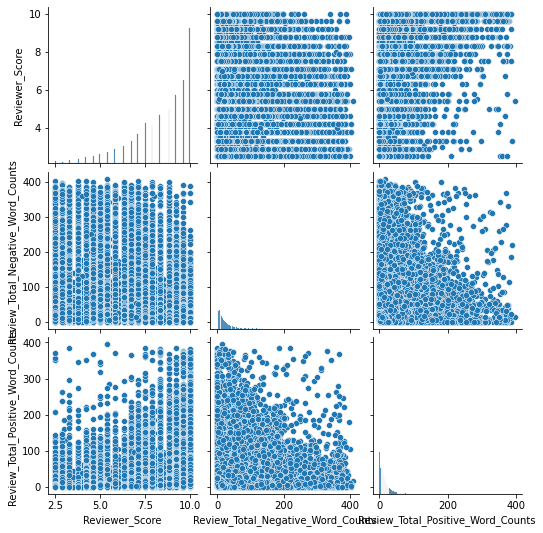

In [12]:
#Select Numeric Columns
n_columns = ['Reviewer_Score','Review_Total_Negative_Word_Counts','Review_Total_Positive_Word_Counts']

#Pair-plot for n-cloumn
sns.pairplot(hotels_new[n_columns])
plt.show()

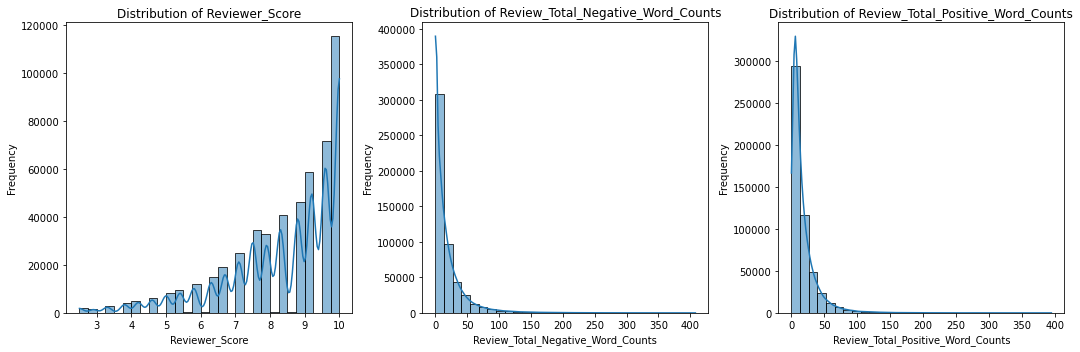

In [13]:
#Distribution Plots :  histograms or kernel density plots
columns = ['Reviewer_Score','Review_Total_Negative_Word_Counts','Review_Total_Positive_Word_Counts']
plt.figure(figsize=(15, 5))

for i, col in enumerate(columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(hotels_new[col], kde=True, bins=30)  # kde=True will also plot the kernel density estimate
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [14]:
# Getting the count of unique values for each categorical column
c_columns = hotels_new.select_dtypes(include=['object']).columns
count = hotels_new[c_columns].nunique()
print(count)

Hotel_Address             1476
Hotel_Name                1475
Reviewer_Nationality       227
Negative_Review         307555
Positive_Review         380653
Tags                     54934
dtype: int64


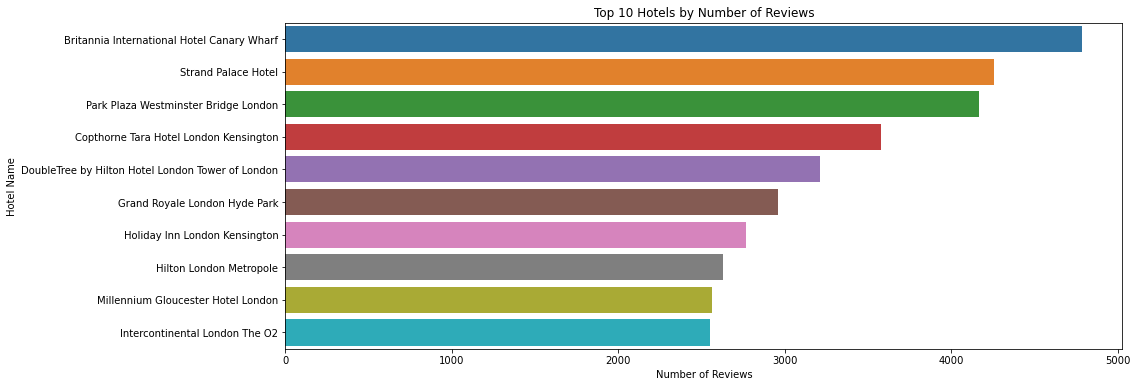

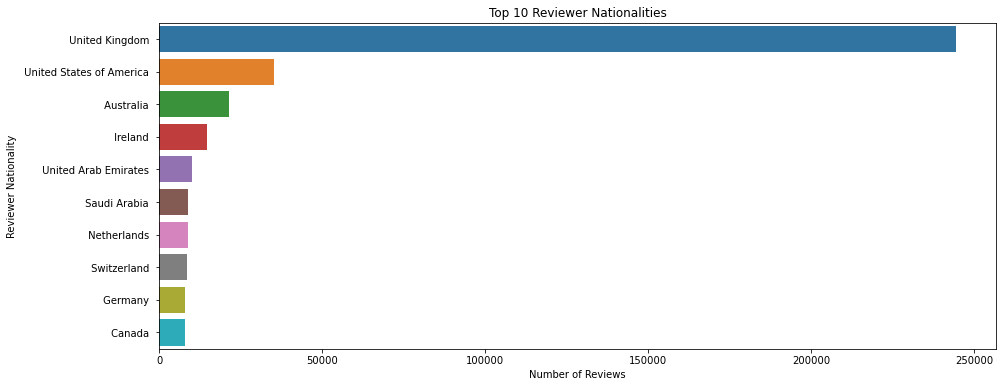

In [15]:
# Plot for Hotel_Name
plt.figure(figsize=(15, 6))
sns.countplot(data=hotels_new, y='Hotel_Name', order=hotels_new['Hotel_Name']
              .value_counts().index[:10])     # Displaying top 10 for better visualization
plt.title('Top 10 Hotels by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Hotel Name')
plt.show()

# Plot for Reviewer_Nationality
plt.figure(figsize=(15, 6))
sns.countplot(data=hotels_new, y='Reviewer_Nationality', order=hotels_new['Reviewer_Nationality']
              .value_counts().index[:10])  # Displaying top 10 for better visualization
plt.title('Top 10 Reviewer Nationalities')
plt.xlabel('Number of Reviews')
plt.ylabel('Reviewer Nationality')
plt.show()

C:\Users\sachin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


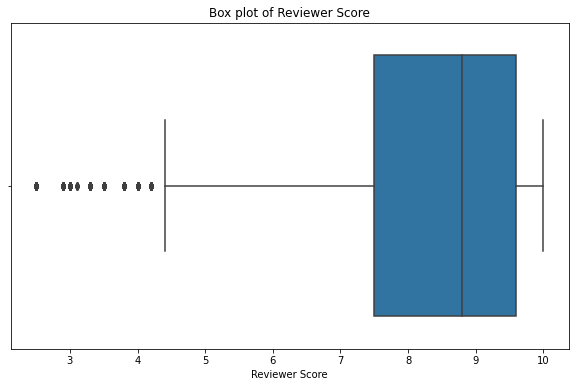

In [16]:
# Create a box plot for Reviewer_Score
plt.figure(figsize=(10, 6))
sns.boxplot(hotels_new['Reviewer_Score'])
plt.title('Box plot of Reviewer Score')
plt.xlabel('Reviewer Score')
plt.show()

In [17]:
hotels_new.shape

(512470, 17)

In [18]:
hotels_new.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

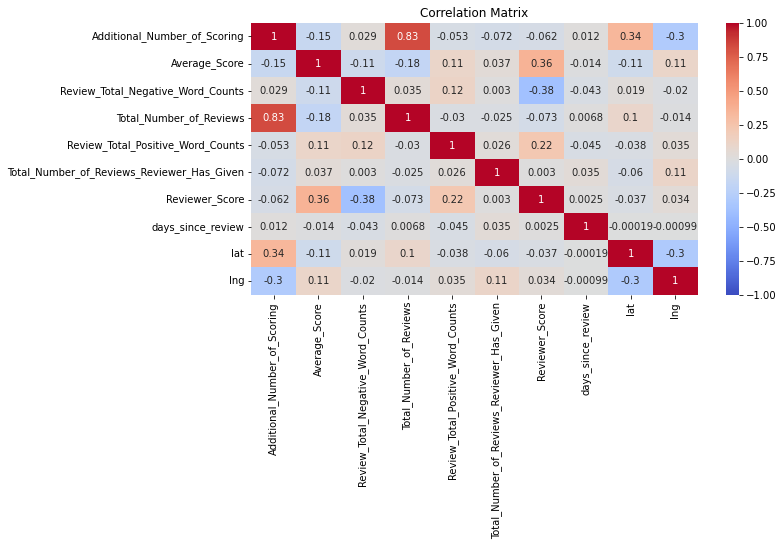

In [19]:
# Compute the correlation matrix
n_columns = hotels_new.select_dtypes(include=['int', 'float']).columns
hotels_new_subset = hotels_new[n_columns]
corr_matrix = hotels_new_subset.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

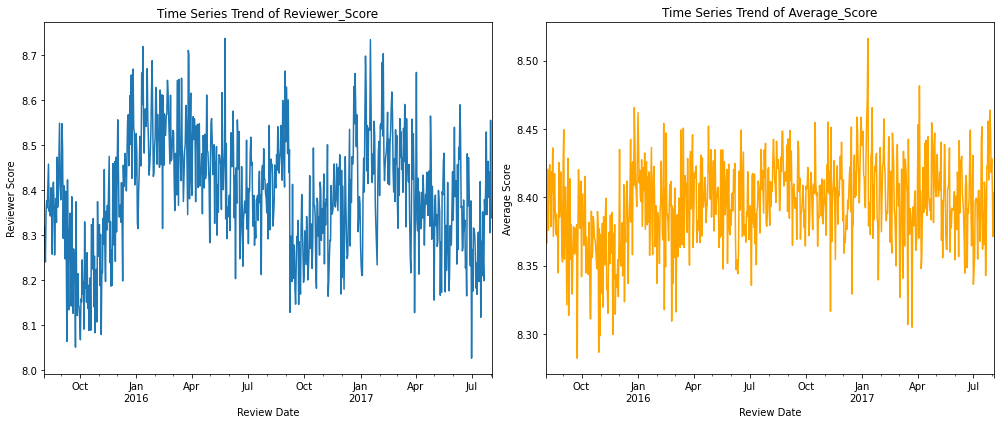

In [20]:
#Time Series Trend
hotels_new['Review_Date'] = pd.to_datetime(hotels_new['Review_Date'])

# Group by 'Review_Date' and calculate the mean 'Reviewer_Score' for each date
reviewer_score_trend = hotels_new.groupby('Review_Date')['Reviewer_Score'].mean()

# Similarly, for 'Average_Score'
average_score_trend = hotels_new.groupby('Review_Date')['Average_Score'].mean()

# Plotting the trends
plt.figure(figsize=(14, 6))

# Reviewer_Score trend
plt.subplot(1, 2, 1)
reviewer_score_trend.plot()
plt.title('Time Series Trend of Reviewer_Score')
plt.xlabel('Review Date')
plt.ylabel('Reviewer Score')

# Average_Score trend
plt.subplot(1, 2, 2)
average_score_trend.plot(color='orange')
plt.title('Time Series Trend of Average_Score')
plt.xlabel('Review Date')
plt.ylabel('Average Score')
plt.tight_layout()
plt.show()

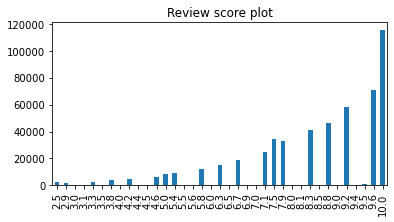

In [21]:
bp=hotels_new['Reviewer_Score'].value_counts().sort_index().plot(kind='bar', title='Review score plot', figsize=(6,3))
plt.show()

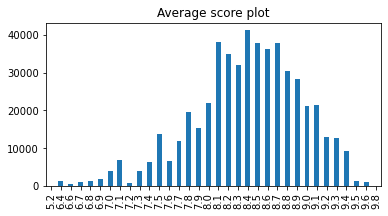

In [22]:
bp=hotels_new['Average_Score'].value_counts().sort_index().plot(kind='bar', title='Average score plot', figsize=(6,3))
plt.show()

In [23]:
# Combine all the positive reviews into one big text
positive_text = ' '.join(hotels_new['Positive_Review'])

# Create the word cloud object
wc_positive = WordCloud(width=800, height=800, background_color='white',
                        stopwords = set(['No', 'Negative', 'Nothing']),
                        collocations=False).generate(positive_text)

# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wc_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()

ValueError: Only supported for TrueType fonts

In [ ]:
# Combine all the negative reviews into one big text
negative_text = ' '.join(hotels_new['Negative_Review'])

# Create the word cloud object
wc_negative = WordCloud(width=800, height=800, background_color='white',
                        stopwords=set(['Good', 'Positive', 'Nothing']),
                        collocations=False).generate(negative_text)

# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wc_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()